<a href="https://colab.research.google.com/github/MartinSotelo2569/sales_predictions/blob/main/PAFinal/proyecto1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Carga y exploración de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE

In [ ]:
df_spredictions = pd.read_csv('/content/drive/MyDrive/Bootcamp Data Analytics/Ejercicios de la plataforma Coding Dojo/Módulo_1/Data Set_Proyecto/sales_predictions.csv')
df_spredictions

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df_spredictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df_spredictions.duplicated().sum()

0

In [ ]:
df_spredictions.drop_duplicates(inplace=True)

In [ ]:
mapea = df_spredictions.dropna(subset=['Item_Weight']).set_index('Item_Identifier')['Item_Weight'].to_dict()
mapea

{'FDA15': 9.3,
 'DRC01': 5.92,
 'FDN15': 17.5,
 'FDX07': 19.2,
 'NCD19': 8.93,
 'FDP36': 10.395,
 'FDO10': 13.65,
 'FDH17': 16.2,
 'FDU28': 19.2,
 'FDY07': 11.8,
 'FDA03': 18.5,
 'FDX32': 15.1,
 'FDS46': 17.6,
 'FDF32': 16.35,
 'FDP49': 9.0,
 'NCB42': 11.8,
 'FDU02': 13.35,
 'FDN22': 18.85,
 'NCB30': 14.6,
 'FDR28': 13.85,
 'NCD06': 13.0,
 'FDV10': 7.645,
 'DRJ59': 11.65,
 'FDE51': 5.925,
 'FDV38': 19.25,
 'NCS17': 18.6,
 'FDP33': 18.7,
 'FDO23': 17.85,
 'DRH01': 17.5,
 'NCX29': 10.0,
 'DRZ11': 8.85,
 'FDK43': 9.8,
 'FDA46': 13.6,
 'FDC02': 21.35,
 'FDL50': 12.15,
 'FDM39': 6.42,
 'NCP05': 19.6,
 'FDV49': 10.0,
 'FDL12': 15.85,
 'NCL17': 7.39,
 'FDM40': 10.195,
 'FDR13': 9.895,
 'FDA43': 10.895,
 'NCP18': 12.15,
 'FDK21': 7.905,
 'NCX54': 9.195,
 'DRK35': 8.365,
 'FDY21': 15.1,
 'FDM20': 10.0,
 'FDV27': 7.97,
 'FDC46': 17.7,
 'FDH19': 19.35,
 'FDZ03': 13.65,
 'DRH37': 17.6,
 'NCI17': 8.645,
 'FDJ58': 15.6,
 'FDH35': 18.25,
 'FDG02': 7.855,
 'NCZ18': 7.825,
 'FDC29': 8.39,
 'FDQ10': 12.

In [ ]:
df_spredictions['Item_Weight'] = df_spredictions.apply(lambda row: mapea.get(row['Item_Identifier'], row['Item_Weight']), axis=1)
df_spredictions['Item_Weight'].interpolate(method='linear', inplace=True)
df_spredictions['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [ ]:
df_spredictions['Item_Fat_Content'] = df_spredictions['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})
df_spredictions['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [ ]:
df_spredictions['Outlet_Size'].fillna(df_spredictions['Outlet_Size'].mode()[0], inplace=True)
df_spredictions['Outlet_Size']

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [ ]:
df_spredictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#Análisis exploratorio de datos

##Gráfica de datos

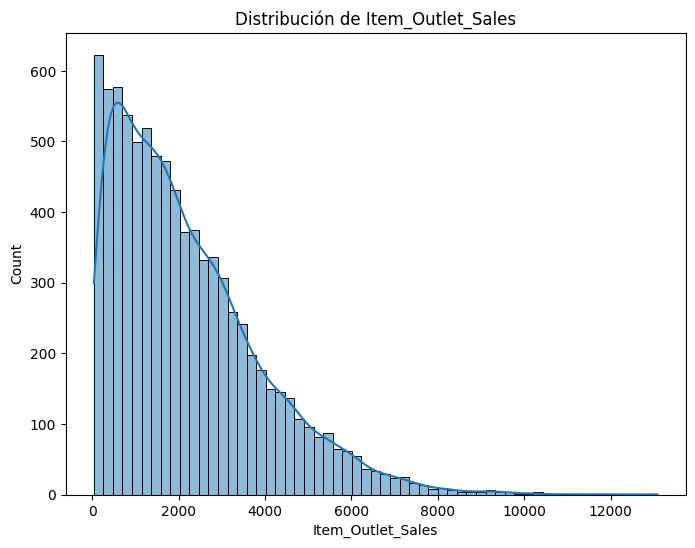

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df_spredictions['Item_Outlet_Sales'], kde=True)
plt.title('Distribución de Item_Outlet_Sales')
plt.show()

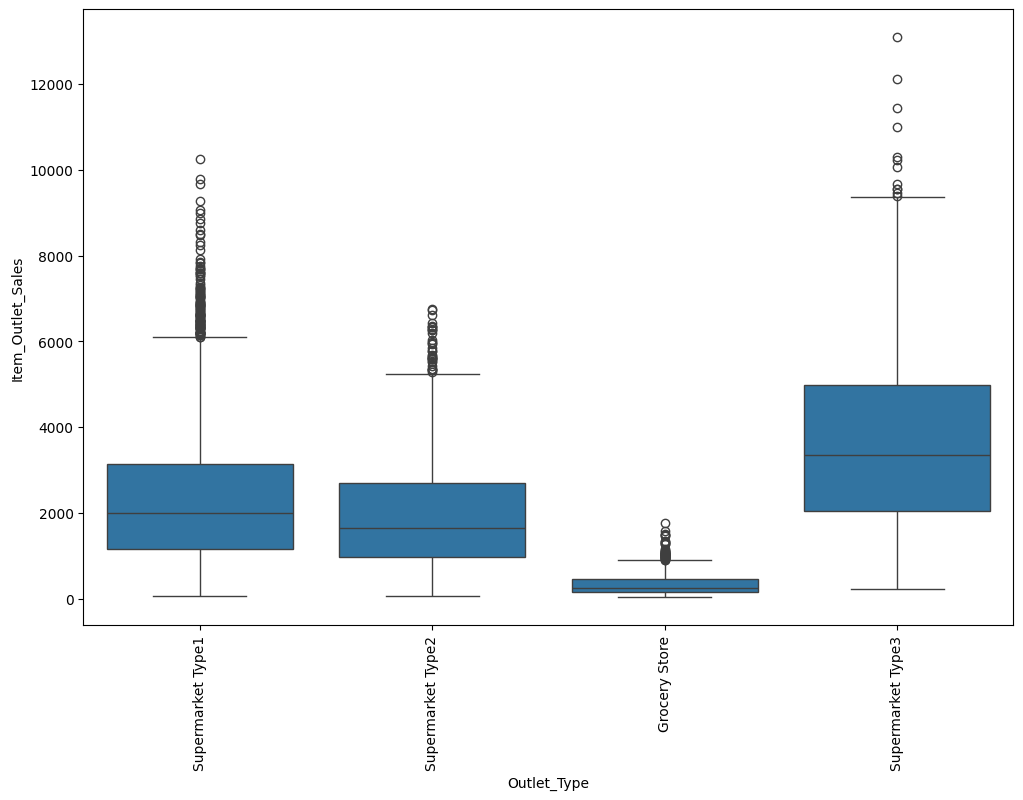

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df_spredictions)
plt.xticks(rotation=90)
plt.show()

#Preprocesamiento

##Definir los tipos de colmna

In [ ]:
features_numericas = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
features_numericas

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [ ]:
features_categoricas = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
features_categoricas

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

##Tuberias de procesamiento

In [ ]:
pipeline_numerico = Pipeline(steps=[
    ('imputador', SimpleImputer(strategy='mean')),
    ('escalador', StandardScaler())
])
pipeline_numerico

Pipeline(steps=[('imputador', SimpleImputer()),
                ('escalador', StandardScaler())])

In [ ]:
pipeline_categorico = Pipeline(steps=[
    ('imputador', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
pipeline_categorico

Pipeline(steps=[('imputador', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
preprocesador = ColumnTransformer(
    transformers=[
        ('num', pipeline_numerico, features_numericas),
        ('cat', pipeline_categorico, features_categoricas)
    ])
preprocesador

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputador', SimpleImputer()),
                                                 ('escalador',
                                                  StandardScaler())]),
                                 ['Item_Weight', 'Item_Visibility', 'Item_MRP',
                                  'Outlet_Establishment_Year']),
                                ('cat',
                                 Pipeline(steps=[('imputador',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Identifier', 'Outlet_Size',
                                  'Outlet_Location_Type', 'Outlet_Type'])])

##Dividir los datos en grupos de entrenamiento y prueba

In [ ]:
X = df_spredictions.drop(columns=['Item_Outlet_Sales'])
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [ ]:
y = df_spredictions['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modelamiento

##Regresión lineal

In [ ]:
pipeline_modelo_lr = Pipeline(steps=[('preprocesador', preprocesador), ('modelo', LinearRegression())])
pipeline_modelo_lr

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputador',
                                                                   SimpleImputer()),
                                                                  ('escalador',
                                                                   StandardScaler())]),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP',
                                                   'Outlet_Establishment_Year']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputador',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('modelo', LinearRegression())])

In [ ]:
scores_lr = cross_val_score(pipeline_modelo_lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_lr_cv = -scores_lr.mean()
print(f'MSE de Regresión Lineal con Validación Cruzada: {mse_lr_cv}')

MSE de Regresión Lineal con Validación Cruzada: 1317798.7381617618


##KNN

In [ ]:
pipeline_modelo_knn = Pipeline(steps=[('preprocesador', preprocesador), ('modelo', KNeighborsRegressor(n_neighbors=5))])
pipeline_modelo_knn

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputador',
                                                                   SimpleImputer()),
                                                                  ('escalador',
                                                                   StandardScaler())]),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP',
                                                   'Outlet_Establishment_Year']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputador',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('modelo', KNeighborsRegressor())])

In [ ]:
param_grid = {
    'modelo__n_neighbors': [3, 5, 7, 9],
    'modelo__weights': ['uniform', 'distance'],
    'modelo__algorithm': ['ball_tree', 'kd_tree', 'brute']
}

In [ ]:
grid_search_knn = GridSearchCV(pipeline_modelo_knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, y_train)
grid_search_knn

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:557: UserWarning:

cannot use tree with sparse input: using brute force

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:557: UserWarning:

cannot use tree with sparse input: using brute force

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:557: UserWarning:

cannot use tree with sparse input: using brute force

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:557: UserWarning:

cannot use tree with sparse input: using brute force

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:557: UserWarning:

cannot use tree with sparse input: using brute force

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:557: UserWarning:

cannot use tree with sparse input: using brute force

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:557: UserWarning:

cannot use tree with sparse input: using brute force

/usr/local/lib/pytho

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocesador',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputador',
                                                                                          SimpleImputer()),
                                                                                         ('escalador',
                                                                                          StandardScaler())]),
                                                                         ['Item_Weight',
                                                                          'Item_Visibility',
                                                                          'Item_MRP',
                                                                          'Outlet_Establishment_Year']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputador',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Item_Fat_Content',
                                                                          'Item_Type',
                                                                          'Outlet_Identifier',
                                                                          'Outlet_Size',
                                                                          'Outlet_Location_Type',
                                                                          'Outlet_Type'])])),
                                       ('modelo', KNeighborsRegressor())]),
             param_grid={'modelo__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'modelo__n_neighbors': [3, 5, 7, 9],
                         'modelo__weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [ ]:
mejor_knn = grid_search_knn.best_estimator_
mse_knn = -grid_search_knn.best_score_
print(f'MSE del mejor KNN: {mse_knn}')
print(f'Mejores hiperparámetros: {grid_search_knn.best_params_}')

MSE del mejor KNN: 1370825.8395715447
Mejores hiperparámetros: {'modelo__algorithm': 'ball_tree', 'modelo__n_neighbors': 9, 'modelo__weights': 'uniform'}


##Random forest

In [ ]:
pipeline_modelo_rf = Pipeline(steps=[('preprocesador', preprocesador), ('modelo', RandomForestRegressor(random_state=42))])
pipeline_modelo_rf

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputador',
                                                                   SimpleImputer()),
                                                                  ('escalador',
                                                                   StandardScaler())]),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP',
                                                   'Outlet_Establishment_Year']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputador',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('modelo', RandomForestRegressor(random_state=42))])

In [ ]:
param_grid_rf = {
    'modelo__n_estimators': [100],
    'modelo__max_features': ['auto'],
    'modelo__max_depth': [10],
}

In [ ]:
grid_search_rf = GridSearchCV(pipeline_modelo_rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
grid_search_rf

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraT

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocesador',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputador',
                                                                                          SimpleImputer()),
                                                                                         ('escalador',
                                                                                          StandardScaler())]),
                                                                         ['Item_Weight',
                                                                          'Item_Visibility',
                                                                          'Item_MRP',
                                                                          'Outlet_Establishment_Year']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputador',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Item_Fat_Content',
                                                                          'Item_Type',
                                                                          'Outlet_Identifier',
                                                                          'Outlet_Size',
                                                                          'Outlet_Location_Type',
                                                                          'Outlet_Type'])])),
                                       ('modelo',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'modelo__max_depth': [10],
                         'modelo__max_features': ['auto'],
                         'modelo__n_estimators': [100]},
             scoring='neg_mean_squared_error')

In [ ]:
mejor_rf = grid_search_rf.best_estimator_
mse_rf = -grid_search_rf.best_score_
print(f'MSE del mejor Random Forest: {mse_rf}')
print(f'Mejores hiperparámetros: {grid_search_rf.best_params_}')

MSE del mejor Random Forest: 1228312.8182401408
Mejores hiperparámetros: {'modelo__max_depth': 10, 'modelo__max_features': 'auto', 'modelo__n_estimators': 100}


#Evaluación del modelo

##Regresión lineal

In [ ]:
pipeline_modelo_lr.fit(X_train, y_train)
y_pred_lr = pipeline_modelo_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'MSE de Regresión Lineal: {mse_lr}')
print(f'MAE de Regresión Lineal: {mae_lr}')
print(f'R2 de Regresión Lineal: {r2_lr}')

MSE de Regresión Lineal: 1143458.6316303217
MAE de Regresión Lineal: 791.9062869115072
R2 de Regresión Lineal: 0.5792968268213206


##KNN

In [ ]:
y_pred_knn = mejor_knn.predict(X_test)
mse_knn_test = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f'MSE del mejor KNN: {mse_knn_test}')
print(f'MAE del mejor KNN: {mae_knn}')
print(f'R2 del mejor KNN: {r2_knn}')

MSE del mejor KNN: 1239600.5587900772
MAE del mejor KNN: 790.2169981622678
R2 del mejor KNN: 0.5439241314628941


##Random forest

In [ ]:
y_pred_rf = mejor_rf.predict(X_test)
mse_rf_test = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'MSE del mejor Random Forest: {mse_rf_test}')
print(f'MAE del mejor Random Forest: {mae_rf}')
print(f'R2 del mejor Random Forest: {r2_rf}')

MSE del mejor Random Forest: 1066259.3905346454
MAE del mejor Random Forest: 720.7340452620621
R2 del mejor Random Forest: 0.6077000980875757
